## Preprocessing on Merged Dataset

In [111]:
# Importing dependencies
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import imghdr
import pathlib
import os
import Augmentor
import shutil
import matplotlib.pyplot as plt
import cv2
import PIL
import PIL.Image
import numpy as np

In [112]:
# Setting up dataset path
data_dir = r"Please provide dataset path here"
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/Vishal Sahni/Desktop/TUTORIALS/Omdena/Algeria_Chapter_Green_part-2/task-2-eda-for-diseases-and-pests-detection/Merging_the_dataset/Merged_Datasets')

In [113]:
# creating list of classes
class_name = os.listdir(data_dir)
class_name

['Apple Apple scab',
 'Apple Black rot',
 'Apple Cedar apple rust',
 'Apple healthy',
 'Blueberry healthy',
 'Cherry healthy',
 'Cherry Powdery mildew',
 'Corn Gray Leaf Spot',
 'Corn healthy',
 'Corn Leaf Blight',
 'Corn Leaf Common Rust',
 'Corn Northern Leaf Blight',
 'Grape Black rot',
 'Grape Esca (Black Measles)',
 'Grape healthy',
 'Grape Leaf blight (Isariopsis Leaf Spot)',
 'Orange Haunglongbing (Citrus greening)',
 'Peach Bacterial spot',
 'Peach healthy',
 'Pepper bell Bacterial spot',
 'Pepper bell healthy',
 'Potato Early blight',
 'Potato healthy',
 'potato hollow heart',
 'Potato Late blight',
 'Raspberry healthy',
 'Rice Bacterial leaf blight',
 'Rice Leaf smut',
 'Rice Sogatella',
 'Soybean healthy',
 'Squash___Powdery_mildew',
 'Strawberry healthy',
 'Strawberry Leaf_scorch',
 'Tea algal leaf',
 'Tea anthracnose',
 'Tea bird eye spot',
 'Tea brown blight',
 'Tea healthy',
 'Tea red leaf spot',
 'Tomato Bacterial spot',
 'Tomato Early blight',
 'Tomato healthy',
 'Toma

In [114]:
# Checking for Available Image Types and Corresponding Image Counts
img_path = [os.path.join(data_dir,name) for name in class_name]
img_types = {}
for images in img_path:
    for f in os.listdir(images):
        img = Image.open(os.path.join(images,f))
        if img.format not in img_types:
                img_types[img.format] = 1
        else:
                img_types[img.format] += 1
img_types

{'JPEG': 47702, 'PNG': 4, 'MPO': 1}

In [115]:
# Getting a dictionary with class_name as a key and image count as value.
number_classes = {}
for name in class_name:
  number_classes[name] = len(os.listdir(f"{data_dir}/{name}"))

number_classes

{'Apple Apple scab': 1029,
 'Apple Black rot': 1029,
 'Apple Cedar apple rust': 1029,
 'Apple healthy': 1029,
 'Blueberry healthy': 1029,
 'Cherry healthy': 1029,
 'Cherry Powdery mildew': 1029,
 'Corn Gray Leaf Spot': 574,
 'Corn healthy': 1162,
 'Corn Leaf Blight': 1146,
 'Corn Leaf Common Rust': 1306,
 'Corn Northern Leaf Blight': 985,
 'Grape Black rot': 1180,
 'Grape Esca (Black Measles)': 1383,
 'Grape healthy': 423,
 'Grape Leaf blight (Isariopsis Leaf Spot)': 1076,
 'Orange Haunglongbing (Citrus greening)': 2508,
 'Peach Bacterial spot': 2297,
 'Peach healthy': 360,
 'Pepper bell Bacterial spot': 997,
 'Pepper bell healthy': 1477,
 'Potato Early blight': 1000,
 'Potato healthy': 152,
 'potato hollow heart': 60,
 'Potato Late blight': 1000,
 'Raspberry healthy': 371,
 'Rice Bacterial leaf blight': 40,
 'Rice Leaf smut': 80,
 'Rice Sogatella': 26,
 'Soybean healthy': 2052,
 'Squash___Powdery_mildew': 1835,
 'Strawberry healthy': 456,
 'Strawberry Leaf_scorch': 1109,
 'Tea algal l

In [117]:
# Calculating mean to balance the dataset according to it.
mean = sum(number_classes.values())//len(number_classes.values())
print(f"mean of total images: {mean}")

mean value of image is 973


In [121]:
def augmentImages(path,sample):
    """
    This function takes Image Path and sample (no of images we want to augment) as an argument.
    The data is augmented and saved to the given path.
    """
    try:
        p = Augmentor.Pipeline(path)
        p.rotate(probability=0.3, max_left_rotation=10, max_right_rotation=10)
        p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
        p.flip_random(probability=0.4)
        p.sample(sample)
            
    except error as e:
        print(e)
        im = Image.open(name)
        rgb_im = im.convert('RGB')
        rgb_im.save(f'{name}.jpg')
    
    
    aug_img_list = os.listdir(pathlib.Path(f"{path}/output"))
    for img in aug_img_list:
        src_path = os.path.join(f"{path}/output",img)
        shutil.move(src_path, path)
    os.rmdir(pathlib.Path(f"{path}/output"))
    

In [122]:
def deleteImages(path,sample):
    """
    This function takes Image Path and sample (no of images we want to delete) as an argument.
    The given no of images are removed from the given path.
    """
    img_list = os.listdir(path)
    for i in range(sample):
        os.remove(f"{path}/{img_list[i]}")

In [123]:
"""
This code block calls the augmentImage and deleteImage function if the class size is less than mean or greater than mean
respectively. And if the class is balanced then it prints the message "balanced class".
"""
for name in class_name:
    path = pathlib.Path(f"{data_dir}/{name}/")
    no_of_images = len(os.listdir(path))
    if no_of_images < mean:
        augmentImages(path,mean-no_of_images)
    elif no_of_images > mean:
        deleteImages(path,no_of_images - mean)
    else:
        print("balanced class")

balanced class
balanced class
balanced class
balanced class
balanced class
balanced class
balanced class
Initialised with 574 image(s) found.
Output directory set to C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Algeria_Chapter_Green_part-2\task-2-eda-for-diseases-and-pests-detection\Merging_the_dataset\Merged_Datasets\Corn Gray Leaf Spot\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x233B101A100>: 100%|█| 398/398 [00:01<00:


Initialised with 423 image(s) found.
Output directory set to C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Algeria_Chapter_Green_part-2\task-2-eda-for-diseases-and-pests-detection\Merging_the_dataset\Merged_Datasets\Grape healthy\output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x233B5F90940>: 100%|█| 550/550 [00:01<00:00, 339.57 Samples


Initialised with 360 image(s) found.
Output directory set to C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Algeria_Chapter_Green_part-2\task-2-eda-for-diseases-and-pests-detection\Merging_the_dataset\Merged_Datasets\Peach healthy\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x233B102B790>: 100%|█| 613/613 [00:01<00:


Initialised with 152 image(s) found.
Output directory set to C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Algeria_Chapter_Green_part-2\task-2-eda-for-diseases-and-pests-detection\Merging_the_dataset\Merged_Datasets\Potato healthy\output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x233A647CBE0>: 100%|█| 821/821 [00:02<00:00, 363.92 Samples


Initialised with 60 image(s) found.
Output directory set to C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Algeria_Chapter_Green_part-2\task-2-eda-for-diseases-and-pests-detection\Merging_the_dataset\Merged_Datasets\potato hollow heart\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225 at 0x233B5FB4A30>: 100%|█| 913/913 [00:02<00:


Initialised with 371 image(s) found.
Output directory set to C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Algeria_Chapter_Green_part-2\task-2-eda-for-diseases-and-pests-detection\Merging_the_dataset\Merged_Datasets\Raspberry healthy\output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x233B0E0DD60>: 100%|█| 602/602 [00:01<00:00, 411.19 Samples


Initialised with 40 image(s) found.
Output directory set to C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Algeria_Chapter_Green_part-2\task-2-eda-for-diseases-and-pests-detection\Merging_the_dataset\Merged_Datasets\Rice Bacterial leaf blight\output.

Processing <PIL.Image.Image image mode=RGB size=3081x897 at 0x233A64FAD00>: 100%|█| 933/933 [00:35<00:00, 26.44 Samples


Initialised with 80 image(s) found.
Output directory set to C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Algeria_Chapter_Green_part-2\task-2-eda-for-diseases-and-pests-detection\Merging_the_dataset\Merged_Datasets\Rice Leaf smut\output.

Processing <PIL.Image.Image image mode=RGB size=316x127 at 0x2338FCE5FA0>: 100%|█| 893/893 [00:24<00:00, 35.95 Samples/


Initialised with 26 image(s) found.
Output directory set to C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Algeria_Chapter_Green_part-2\task-2-eda-for-diseases-and-pests-detection\Merging_the_dataset\Merged_Datasets\Rice Sogatella\output.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x2338FD0A9D0>: 100%|█| 947/947 [00:02<00:00, 359.40 Samples


Initialised with 456 image(s) found.
Output directory set to C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Algeria_Chapter_Green_part-2\task-2-eda-for-diseases-and-pests-detection\Merging_the_dataset\Merged_Datasets\Strawberry healthy\output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x2338FCE1D90>: 100%|█| 517/517 [00:01<00:00, 397.23 Samples


Initialised with 113 image(s) found.
Output directory set to C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Algeria_Chapter_Green_part-2\task-2-eda-for-diseases-and-pests-detection\Merging_the_dataset\Merged_Datasets\Tea algal leaf\output.

Processing <PIL.Image.Image image mode=RGB size=768x1024 at 0x233B0ED50A0>: 100%|█| 860/860 [00:10<00:00, 79.09 Samples


Initialised with 100 image(s) found.
Output directory set to C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Algeria_Chapter_Green_part-2\task-2-eda-for-diseases-and-pests-detection\Merging_the_dataset\Merged_Datasets\Tea anthracnose\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3120x4160 at 0x2338FD0D2B0>: 100%|█| 873/873 [02:31<0


Initialised with 100 image(s) found.
Output directory set to C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Algeria_Chapter_Green_part-2\task-2-eda-for-diseases-and-pests-detection\Merging_the_dataset\Merged_Datasets\Tea bird eye spot\output.

Processing <PIL.Image.Image image mode=RGB size=4160x3120 at 0x233AEAD62B0>: 100%|█| 873/873 [02:20<00:00,  6.19 Sample


Initialised with 113 image(s) found.
Output directory set to C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Algeria_Chapter_Green_part-2\task-2-eda-for-diseases-and-pests-detection\Merging_the_dataset\Merged_Datasets\Tea brown blight\output.

Processing <PIL.Image.Image image mode=RGB size=768x1024 at 0x233B5FA7F40>: 100%|█| 860/860 [00:10<00:00, 82.71 Samples


Initialised with 74 image(s) found.
Output directory set to C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Algeria_Chapter_Green_part-2\task-2-eda-for-diseases-and-pests-detection\Merging_the_dataset\Merged_Datasets\Tea healthy\output.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x233AEABEEB0>: 100%|█| 899/899 [00:12<00:00, 74.17 Sample


Initialised with 143 image(s) found.
Output directory set to C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Algeria_Chapter_Green_part-2\task-2-eda-for-diseases-and-pests-detection\Merging_the_dataset\Merged_Datasets\Tea red leaf spot\output.

Processing <PIL.Image.Image image mode=RGB size=768x1024 at 0x233B5F9CEB0>: 100%|█| 830/830 [00:09<00:00, 83.05 Samples


Initialised with 952 image(s) found.
Output directory set to C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Algeria_Chapter_Green_part-2\task-2-eda-for-diseases-and-pests-detection\Merging_the_dataset\Merged_Datasets\Tomato Leaf Mold\output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x233B0DBEF10>: 100%|█| 21/21 [00:00<00:00, 226.99 Samples/s


Initialised with 373 image(s) found.
Output directory set to C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Algeria_Chapter_Green_part-2\task-2-eda-for-diseases-and-pests-detection\Merging_the_dataset\Merged_Datasets\Tomato Tomato mosaic virus\output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x2338FD19FD0>: 100%|█| 600/600 [00:01<00:00, 535.71 Samples


In [133]:
number_classes = {}
for name in class_name:
  number_classes[name] = len(os.listdir(f"{data_dir}/{name}"))

number_classes

{'Apple Apple scab': 973,
 'Apple Black rot': 973,
 'Apple Cedar apple rust': 973,
 'Apple healthy': 973,
 'Blueberry healthy': 973,
 'Cherry healthy': 973,
 'Cherry Powdery mildew': 973,
 'Corn Gray Leaf Spot': 973,
 'Corn healthy': 973,
 'Corn Leaf Blight': 973,
 'Corn Leaf Common Rust': 973,
 'Corn Northern Leaf Blight': 973,
 'Grape Black rot': 973,
 'Grape Esca (Black Measles)': 973,
 'Grape healthy': 973,
 'Grape Leaf blight (Isariopsis Leaf Spot)': 973,
 'Orange Haunglongbing (Citrus greening)': 973,
 'Peach Bacterial spot': 973,
 'Peach healthy': 973,
 'Pepper bell Bacterial spot': 973,
 'Pepper bell healthy': 973,
 'Potato Early blight': 973,
 'Potato healthy': 973,
 'potato hollow heart': 973,
 'Potato Late blight': 973,
 'Raspberry healthy': 973,
 'Rice Bacterial leaf blight': 973,
 'Rice Leaf smut': 973,
 'Rice Sogatella': 973,
 'Soybean healthy': 973,
 'Squash___Powdery_mildew': 973,
 'Strawberry healthy': 973,
 'Strawberry Leaf_scorch': 973,
 'Tea algal leaf': 973,
 'Tea 

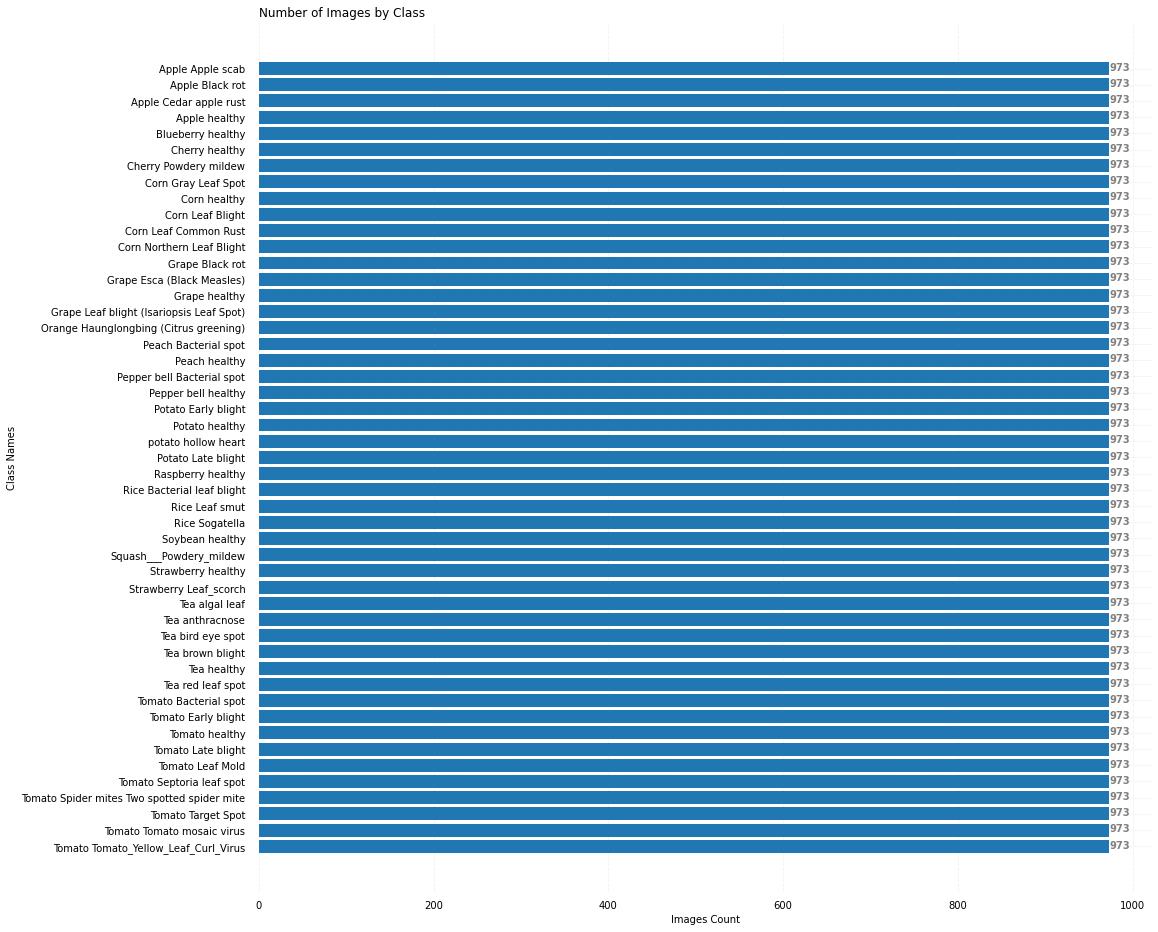

In [134]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 16))

# Horizontal Bar Plot
ax.barh(list(number_classes.keys()), list(number_classes.values()))

# Remove axis splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()


# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
            str(round((i.get_width()), 2)),
            fontsize = 10, fontweight ='bold',
            color ='grey')
 
# Add Plot Title
ax.set_title('Number of Images by Class',
            loc ='left', )

plt.xlabel('Images Count')
plt.ylabel('Class Names')

# Show Plot
plt.show()

## Creating a Dataset

define some parameters for the loader

In [135]:
batch_size = 32
img_height = 256
img_width = 256

In [136]:
# Training set

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, # location of directory where data labels are folder name
    validation_split = 0.2, # split the 20% data for validation and 80% for training
    subset = 'training', # setting value (training or validation)
    seed = 12, # its a seed number for random initialization
    image_size = (img_height, img_width), # setting  up the image height and width
    batch_size = (batch_size) # setting the batch size
)

Found 47677 files belonging to 49 classes.
Using 38142 files for training.


In [137]:
# Validation set

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, # location of directory where data labels are folder name
    validation_split = 0.2, # split the 20% data for validation and 80% for training
    subset = 'validation', # setting value (training or validation)
    seed = 12, # its a seed number for random initialization
    image_size = (img_height, img_width), # setting  up the image height and width
    batch_size = (batch_size) # setting the batch size
)

Found 47677 files belonging to 49 classes.
Using 9535 files for validation.


## Visualising the data

In [138]:
class_names = os.listdir(data_dir)
class_names

['Apple Apple scab',
 'Apple Black rot',
 'Apple Cedar apple rust',
 'Apple healthy',
 'Blueberry healthy',
 'Cherry healthy',
 'Cherry Powdery mildew',
 'Corn Gray Leaf Spot',
 'Corn healthy',
 'Corn Leaf Blight',
 'Corn Leaf Common Rust',
 'Corn Northern Leaf Blight',
 'Grape Black rot',
 'Grape Esca (Black Measles)',
 'Grape healthy',
 'Grape Leaf blight (Isariopsis Leaf Spot)',
 'Orange Haunglongbing (Citrus greening)',
 'Peach Bacterial spot',
 'Peach healthy',
 'Pepper bell Bacterial spot',
 'Pepper bell healthy',
 'Potato Early blight',
 'Potato healthy',
 'potato hollow heart',
 'Potato Late blight',
 'Raspberry healthy',
 'Rice Bacterial leaf blight',
 'Rice Leaf smut',
 'Rice Sogatella',
 'Soybean healthy',
 'Squash___Powdery_mildew',
 'Strawberry healthy',
 'Strawberry Leaf_scorch',
 'Tea algal leaf',
 'Tea anthracnose',
 'Tea bird eye spot',
 'Tea brown blight',
 'Tea healthy',
 'Tea red leaf spot',
 'Tomato Bacterial spot',
 'Tomato Early blight',
 'Tomato healthy',
 'Toma

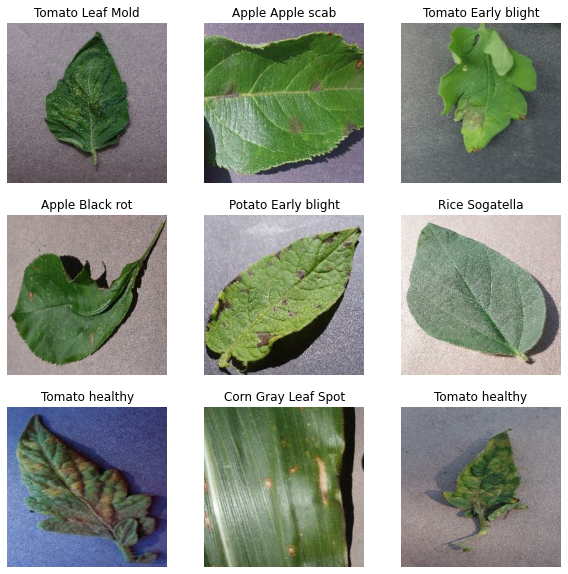

In [139]:
plt.figure(figsize=(10,10))
for image, label in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("int"))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [140]:
print(len(train_ds))
for image_batch, label_batch in train_ds:
    print(image_batch.shape)
    print(label_batch.shape)
    break

1192
(32, 256, 256, 3)
(32,)


## Configure the dataset for performance

In [141]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(200).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

## Standardise the data


The RGB channel values are in the [0,255] range. So we can scale the data in the range of [0,1].

In [100]:
normalization_layer = layers.Rescaling(1./255)